# **Eploratory Data Analysis**  
> 📈 **Visualizing**
+ In this notebook, we'll visually analyse and explore the data

## Loading the data
> And we always have to begin here, don't we?

In [ ]:
# import pandas, matplotlib, seaborn, warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# suppress UserWarning
warnings.filterwarnings('ignore', category=UserWarning)

# specify stylesheet
plt.style.use('fast')

In [ ]:
# load the data (the path may vary depending on where the file is stored)
crops = pd.read_csv('/content/crop_recommendation.csv')

# dataframe info:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
# All values in 'label' column will start with an uppercase
crops['label'] = crops['label'].apply(lambda x: x.capitalize())

## Label Analysis
> In a classification problem, it's standard procedure to analyse the target variable, `label` in this case
+ Label distribution

### Label classes
+ Using the [`Series.unique()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html) method, we can return the unique labels within the `label` column in the dataframe

In [ ]:
# distinct label classes
crops['label'].unique()

array(['Rice', 'Maize', 'Chickpea', 'Kidneybeans', 'Pigeonpeas',
       'Mothbeans', 'Mungbean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [ ]:
# also, we can find out how many classes there are in total
crops['label'].nunique()

22

### Label class distribution
+ To find out how the distinct classes are represented within the dataset, the [`Series.value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) returns a [`Series`](https://pandas.pydata.org/docs/reference/series.html) containing counts of unique values

In [ ]:
crops['label'].value_counts()

,count
label,
Rice,100
Maize,100
Jute,100
Cotton,100
Coconut,100
Papaya,100
Orange,100
Apple,100
Muskmelon,100


#### **Plotting class distribution**
+ A [`seaborn`](https://seaborn.pydata.org/index.html) [`countplot`](https://seaborn.pydata.org/generated/seaborn.countplot.html) is used for visualization


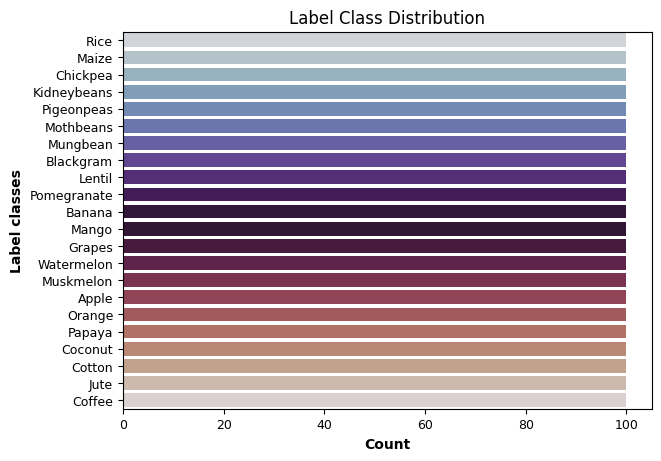

In [ ]:
# Plotting class distribution on a bar chart

# specify figure and Axes
_, ax = plt.subplots(figsize=(6.5,4.5), layout='constrained')

sns.countplot(data=crops, y='label',
              hue='label', palette='twilight',
              orient='h', legend=False, ax=ax)

# set title, and axis labels
ax.set_title('Label Class Distribution')
ax.set_xlabel('Count', weight='black')
ax.set_ylabel('Label classes', weight='black')
# capitalize class names
ax.tick_params(labelsize=9)

plt.show()

> 💡 **Insight**
+ The dataset contains 22 label classes
+ Since the label classes are evenly distributed `(100)`, this is a balanced dataset, making our classification task much easier 🎊

## Feature Analysis
> We'll now focus on the features, and focus on the following
+ Feature distribution per column
+ Mean value of distinct features for each class
+ Relationship between features and label (categorical)
+ Correlation between features

In [ ]:
# Let's start by peeking into the data
crops.sample(5)

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
564,22,36,16,30.581395,50.771481,8.184229,64.585596,Mothbeans
1895,22,8,33,28.435729,95.884041,5.665785,203.928371,Coconut
517,0,55,25,28.174894,43.667230,4.524172,45.781728,Mothbeans
1766,63,58,50,43.037143,94.642890,6.720744,41.585659,Papaya
1949,111,50,15,25.168201,80.303518,7.884550,84.624190,Cotton


### Feature distribution per column
> We'll use a [`seaborn`](https://seaborn.pydata.org/index.html) [`histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot) as a classic visualization tool to represents the distribution of specific features by counting the number of observations that fall within discrete bins

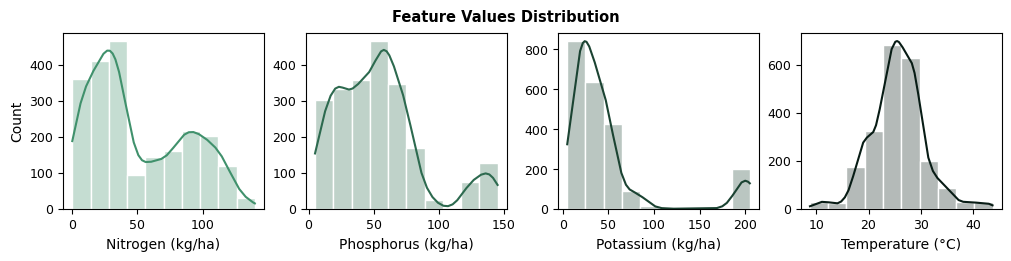

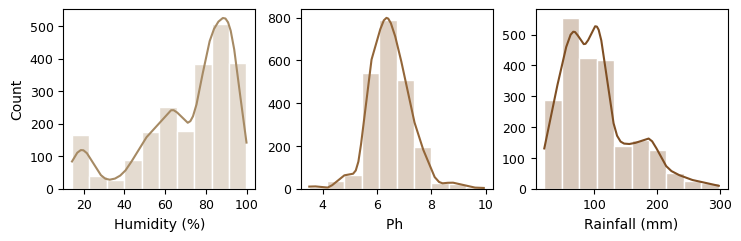

In [ ]:
# colors list for this plot
colors = ['#40916c', '#2d6a4f', '#1b4332', '#081c15',
          '#a68a64', '#936639', '#7f4f24']
units = [' (kg/ha)', ' (kg/ha)', ' (kg/ha)', ' (°C)', ' (%)', ' ', ' (mm)']
# Subplot 1 Axes
fig, axs1 = plt.subplots(nrows=1, ncols=4,
                     figsize=(10,2.5), layout='constrained')

_, axs2 = plt.subplots(nrows=1, ncols=3,
                       figsize=(7.3,2.3), layout='constrained')

for i, col in enumerate(crops.columns[:4]):
  sns.histplot(data=crops, x=col, kde=True,
              edgecolor='#ffffff', alpha=0.3,
              line_kws={'linewidth':1.5}, color=colors[i],
              bins=10, ax=axs1[i])

  # axis labes, xticks
  axs1[i].set_xlabel(f'{col.capitalize()}{units[i]}')
  axs1[i].tick_params(axis='both', labelsize=9)
  # remove ylabel from all subplots except the first
  if i != 0:
    axs1[i].set_ylabel('')


for i, col in enumerate(crops.columns[4: -1]):
  sns.histplot(data=crops, x=col, kde=True,
              edgecolor='#ffffff', alpha=0.3,
              line_kws={'linewidth':1.5}, color=colors[4:][i],
              bins=10, ax=axs2[i])

  # axis labes, xticks
  axs2[i].set_xlabel(f'{col.capitalize()}{units[4:][i]}')
  axs2[i].tick_params(axis='both', labelsize=9)
  # remove ylabel from all subplots except the first
  if i != 0:
    axs2[i].set_ylabel('')

fig.suptitle('Feature Values Distribution',
             weight='black', fontsize=10.5)
plt.show()

> 📈 **Insight**  

> Except `temperature`, `ph` and probably `rainfall`, the rest of the features don't seem to to normally (bell-curve) distributed.
+ Since I'll be working with a tree-based ensemble model, [`CatBoostClassifier`](https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier), we don't really have to worry about that since tree-based models are less sensitive to feature distribution.
+ However, if we were working with linear models (such as `LogisticRegression`), `NaiveBayesClassifier`, distance-based algorithms (such as `KNN`, `SVM`), transformations (such as `scikit-learn's` [`PowerTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html) or [`QuantileTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html)) would have to be included in the pre-processing pipeline to make the data more Gaussian-like

### Mean feature values per class
> First, we'll begin by grouping the dataframe by `label` and aggregate with the `mean`
+ Made possible by the `DataFrame` function [`groupby`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html). See [`here`](https://pandas.pydata.org/docs/user_guide/groupby.html#the-aggregate-method) for details.
+ Aggregate by `mean` using `DataFrameGroupBy` method [`agg()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html#pandas.core.groupby.DataFrameGroupBy.aggregate)
+ Apply a lambda function to round off all column values using the `DataFrame` method [`apply()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)

#### **Group the dataset by class**

In [ ]:
'''
  (a) Group the original dataframe by class, and use classes as index
    (b) Aggregate the groups by mean
      (c) Then round off all column values

      the backward slash just makes it possible to chain methods on a new line
'''
grouped_crops = crops.groupby(by='label', as_index=True)\
                      .agg('mean')\
                      .apply(func=(lambda x: round(x)), axis='columns')

In [ ]:
# view the new dataframe
grouped_crops

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
label,,,,,,,
Apple,21.0,134.0,200.0,23.0,92.0,6.0,113.0
Banana,100.0,82.0,50.0,27.0,80.0,6.0,105.0
Blackgram,40.0,67.0,19.0,30.0,65.0,7.0,68.0
Chickpea,40.0,68.0,80.0,19.0,17.0,7.0,80.0
Coconut,22.0,17.0,31.0,27.0,95.0,6.0,176.0
Coffee,101.0,29.0,30.0,26.0,59.0,7.0,158.0
Cotton,118.0,46.0,20.0,24.0,80.0,7.0,80.0
Grapes,23.0,133.0,200.0,24.0,82.0,6.0,70.0
Jute,78.0,47.0,40.0,25.0,80.0,7.0,175.0


> 👏 **So far?**

> Looking good, now we can plot

#### **Plot mean feature values per class**
+ A [`seaborn`](https://seaborn.pydata.org/index.html) [`barplot`](https://seaborn.pydata.org/generated/seaborn.barplot.html) plot will be used for visualization

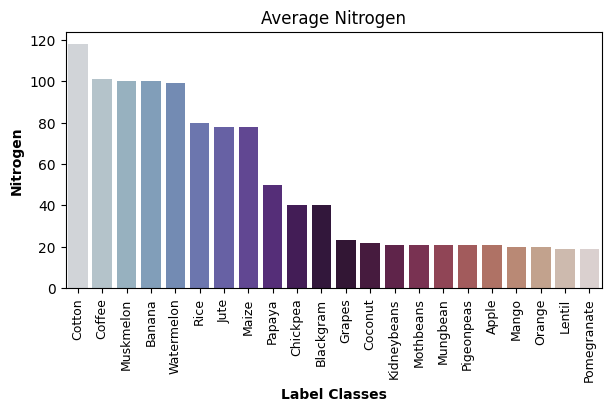

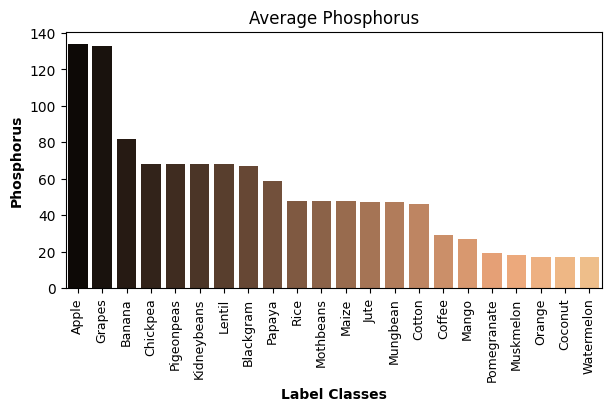

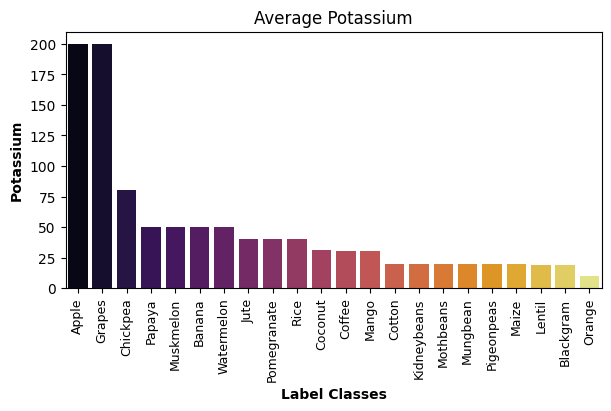

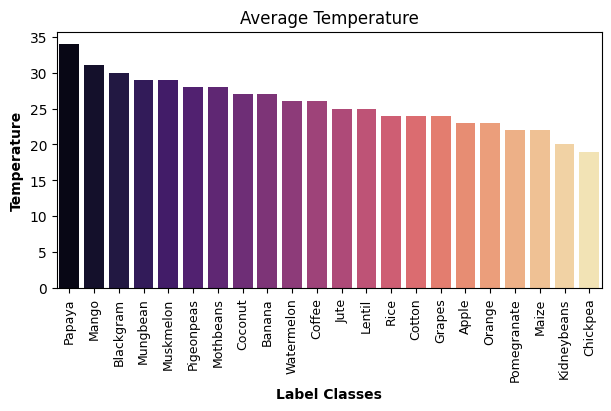

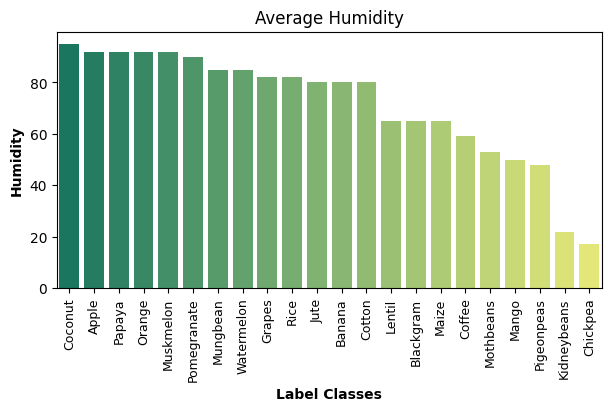

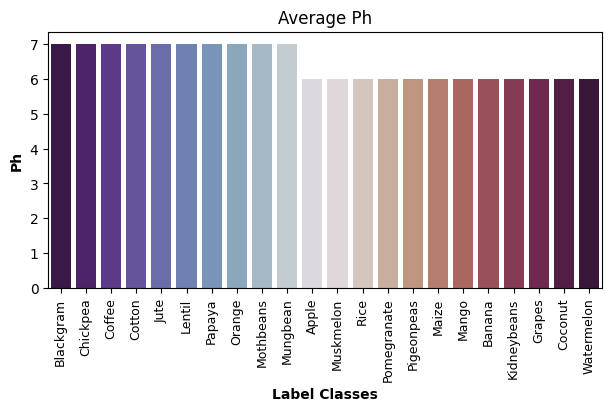

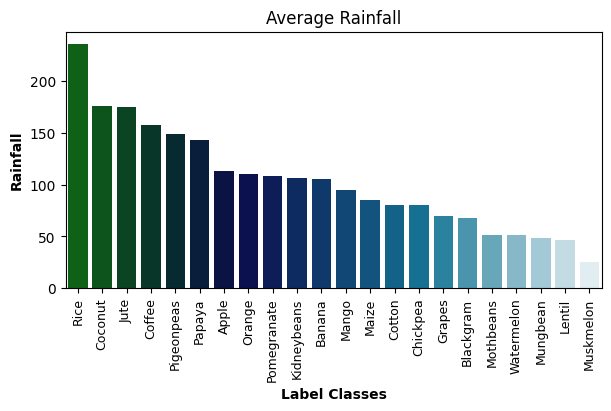

In [ ]:
# color palettes for this plot
col_palettes = ['twilight', 'copper', 'inferno',
                'magma', 'summer', 'twilight_shifted', 'ocean']

# loop through all the column names
for i, col in enumerate(grouped_crops.columns):
  # specify figure and Axes
  _, ax = plt.subplots(figsize=(6, 4), layout='constrained')

  # sort dataframe by current column in descending order
  sorted_grouped_crops = grouped_crops.sort_values(by=col, ascending=False)

  # make plot
  sns.barplot(data=sorted_grouped_crops,
              y=col, x=sorted_grouped_crops.index,
              hue=sorted_grouped_crops.index, legend=False,
              palette=col_palettes[i], ax=ax)

  # Axis labels & title
  ax.set_title(f'Average {col.capitalize()}')
  ax.set_xlabel('Label Classes', weight='black')
  ax.set_ylabel(f'{col.capitalize()}', weight='black')
  ax.tick_params(axis='x', labelrotation=90, labelsize=9)

  plt.show()
  # print a space after each plot
  print('\n')

> 📈 **Observation**

> From the graphs above, it's possible to tell the ideal thriving conditions, i.e, `nitrogen`, `phosphorus`,`potassium`, `temperature`, `humidity`, `ph`, & `rainfall` for various crops
+ Additionally, aside the `ph` feature, the rest of the other features have a _characteristic_ average value across all classes

### Feature-class relationship
+ Since the features are numeric and the `label` column is categorical, a [`seaborn`](https://seaborn.pydata.org/index.html) [`boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html) is most appropriate to visualize how distinct features are distributed across the classes
+ Here, I'll revert to using the original dataset, `crops`

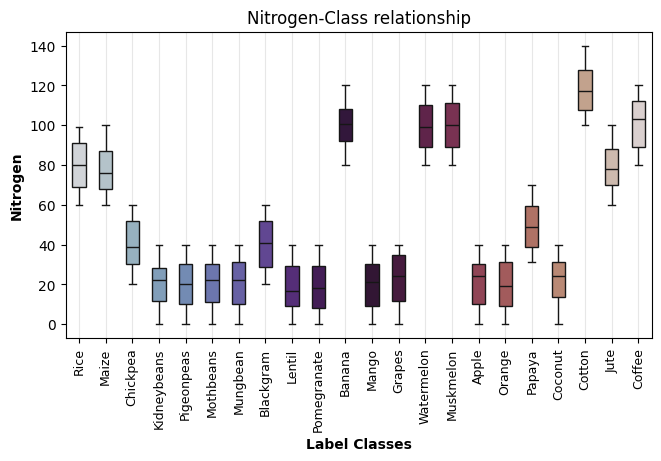

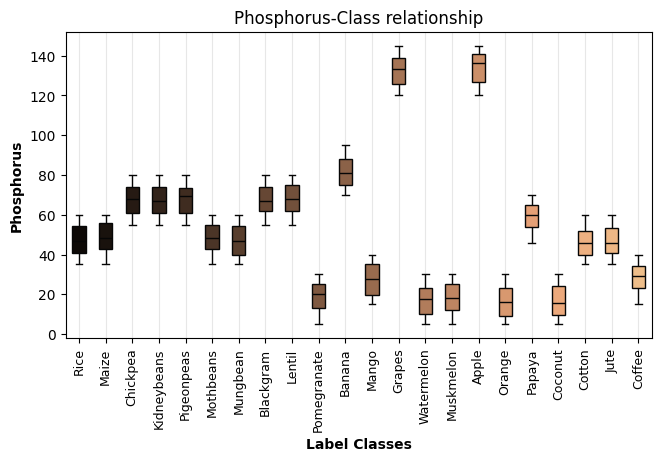

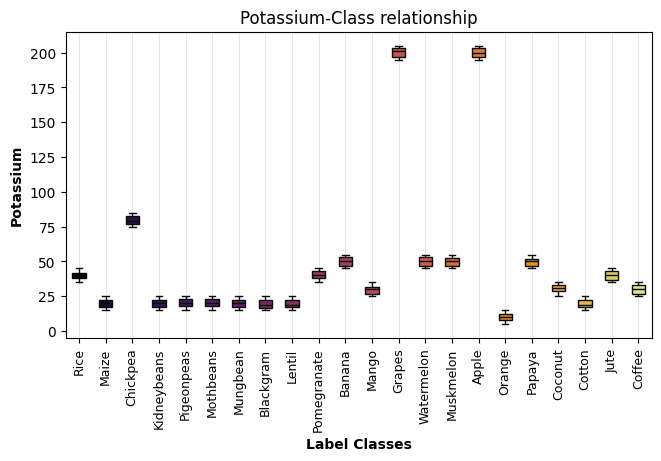

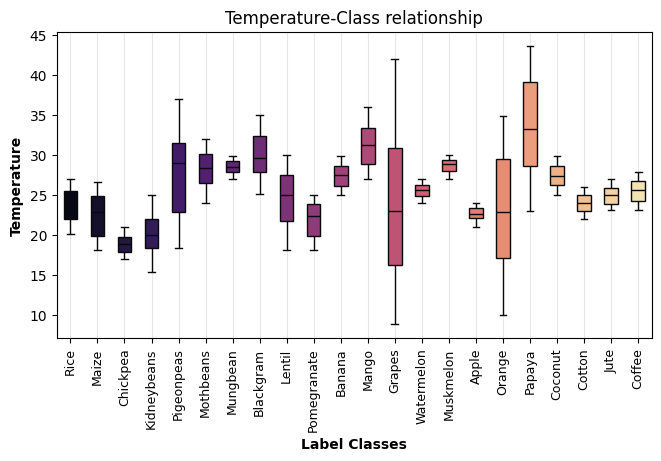

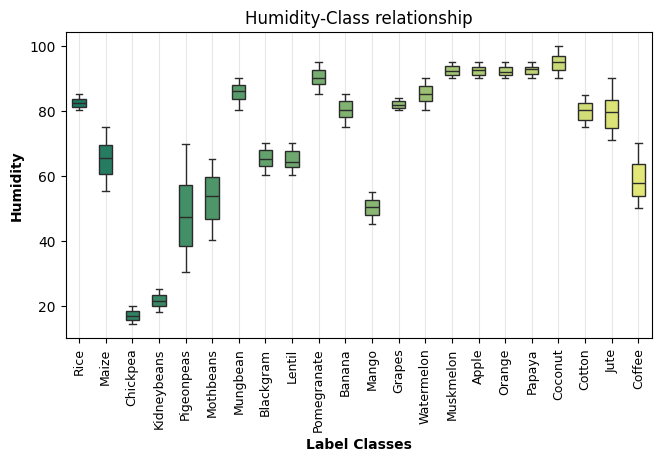

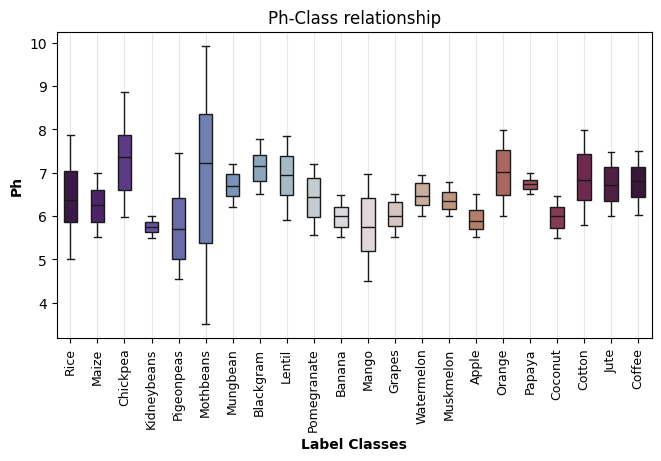

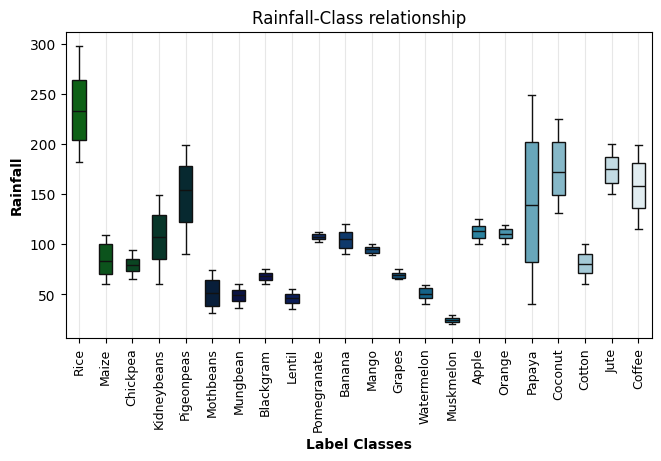

In [ ]:
# color palettes for this plot
col_palettes = ['twilight', 'copper', 'inferno',
                'magma', 'summer', 'twilight_shifted', 'ocean']

# loop through all columns
for i, col in enumerate(crops.columns[:-1]):
  # specify Axes
  _, ax = plt.subplots(figsize=(6.5, 4.5), layout='constrained')

  # box plot
  sns.boxplot(data=crops, y=col, x='label', hue='label',
              palette=col_palettes[i], width=0.5, legend=False,
              ax=ax)

  # Axis labels, title, grid
  ax.tick_params(axis='x', labelrotation=90, labelsize=9)
  ax.set_title(f'{col.capitalize()}-Class relationship')
  ax.set_ylabel(f'{col.capitalize()}', weight='black')
  ax.set_xlabel('Label Classes', weight='black')
  ax.grid(axis='x', alpha=0.3)

  plt.show()
  # print a space
  print('\n')

> 📈 **Insight**

> From the boxplot it is evident that there is varied distribution of the features across class labels in the dataset. Generally speaking, this implies that features have different statistical characteristics (median, spread, interquartile range) across different classes.

### Feature correlation
> Feature correlation may not always dramatically affect model performance (especially since I'll be training an tree-based model later in this exercise) but it doesn't hurt to visualize how the features are correlated
+ To visualize this, we'll make use of the `DataFrame` method [`corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) and pass it to a [`seaborn`](https://seaborn.pydata.org/index.html) [`heatmap`](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

#### Generate correlation matrix

In [ ]:
# correlation matrix, with values rounded to 0.2f
corr_matrix = crops[crops.columns[:-1]]\
            .rename(columns={x:x.capitalize() for x in crops.columns})\
            .corr()\
            .apply(func=(lambda x:round(x, 2)), axis='columns')

# visualize the dataframe
corr_matrix

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,Ph,Rainfall
Nitrogen,1.00,-0.23,-0.14,0.03,0.19,0.10,0.06
Phosphorus,-0.23,1.00,0.74,-0.13,-0.12,-0.14,-0.06
Potassium,-0.14,0.74,1.00,-0.16,0.19,-0.17,-0.05
Temperature,0.03,-0.13,-0.16,1.00,0.21,-0.02,-0.03
Humidity,0.19,-0.12,0.19,0.21,1.00,-0.01,0.09
Ph,0.10,-0.14,-0.17,-0.02,-0.01,1.00,-0.11
Rainfall,0.06,-0.06,-0.05,-0.03,0.09,-0.11,1.00


#### Create a mask to filte the confusion matrix plot
+ Create an array of the same shape as `corr_matrix` using [`numpy.ones_like()`](https://numpy.org/doc/stable/reference/generated/numpy.ones_like.html) where all elements are `True`
+ [`numpy.triu`](https://numpy.org/doc/stable/reference/generated/numpy.triu.html#numpy-triu) returns a `boolean` mask with the upper triangle inclusive of the diagonal contains `True` values and the lower, `False` values
+ The `mask` will be passed to the `mask` parameter of `seaborn` `heatmap` constructor. Cells where the `mask` is `True` will be hidden

In [ ]:
# import numpy
import numpy as np

# Create a mask using numpy's triu function
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

#### Plot correlation matrix
> We'll use a [`seaborn`](https://seaborn.pydata.org/index.html) [`heatmap`](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

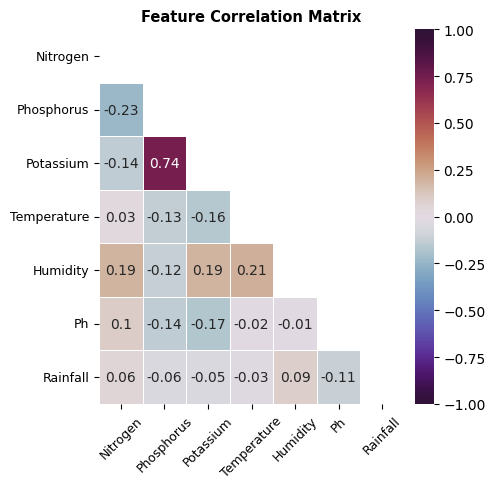

In [ ]:
# specify figure and Axes
_, ax = plt.subplots(figsize=(5,5), layout='tight')

# make plot
sns.heatmap(data=corr_matrix, annot=True, center=-0,
            linewidths=0.5, linecolor='#ffffff',
            vmin=-1, vmax=1, cmap='twilight_shifted', mask=mask,
            cbar_kws={'pad':0.03},
            ax=ax)
# title
ax.set_title('Feature Correlation Matrix',
             weight='black', fontsize=10.5)

# Modify ticks appearance
ax.tick_params(axis='x', labelrotation=45, labelsize=9)
ax.tick_params(axis='y', labelsize=9)
plt.show()

> 📉 **Insight**  

> As it appears, most features have low correlation to each other.

> 📝 **Conclusion**

> Major inferences drawn from the Exploratory Data Analysis (EDA) phase:
+ The dataset is balanced, as all classes are equally represented in the dataset
+ Significant varying distribution of features (as illustrated by the boxplots) indicate that features are highly discriminative
+ Similarly, the distinct feature means across various classes indicates that the classes are clearly distinguished, and that there are potentially clear decision boundaries within the dataset
+ Finally, low correlation between most features means that these values will not dramatically affect model performance
+ In conclusion, **all** features will be useful in modelling as they are descriptive of the target
+ Also, worth noting, this is likely to be a very simple classification task, and a simple model will be chosen to prevent overfitting

> ▶️ **Up Next**
+ Up next comes the fun part, _modelling!_ 🎊